In [18]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras import applications, optimizers

In [93]:
# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model_weights-skewed.h5'
connected_weights = 'bottleneck_fc_model_weights-connected-long.h5'
model_name = 'bottleneck_model-connected-long.h5'
train_data_dir = '../data-connected/train'
test_data_dir = '../data-connected/validation'
nb_train_samples = 3400
nb_test_samples = 500
epochs = 10
batch_size = 16

In [94]:
input_tensor = Input(shape=(img_width, img_height, 3))

model = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
print('VGG16 Loaded')

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

top_model.load_weights(top_model_weights_path)
model = Model(input=model.input, output=top_model(model.output))

for layer in model.layers[:15]:
    layer.trainable = False
    
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=['accuracy'])

# print(model.summary())

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size
    )

model.save_weights(connected_weights)
model.save(model_name)

VGG16 Loaded


/Users/m_664273/Workspace/projects/hot-dog/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  del sys.path[0]


Found 3400 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
212/212 [==============================] - 773s 4s/step - loss: 0.7308 - acc: 0.7444 - val_loss: 0.2142 - val_acc: 0.9355
Epoch 2/10
212/212 [==============================] - 1521s 7s/step - loss: 0.6079 - acc: 0.7709 - val_loss: 0.3140 - val_acc: 0.9254
Epoch 3/10
212/212 [==============================] - 774s 4s/step - loss: 0.4979 - acc: 0.8163 - val_loss: 0.2493 - val_acc: 0.9355
Epoch 4/10
212/212 [==============================] - 778s 4s/step - loss: 0.4838 - acc: 0.7880 - val_loss: 0.2516 - val_acc: 0.9234
Epoch 5/10
212/212 [==============================] - 810s 4s/step - loss: 0.4303 - acc: 0.8175 - val_loss: 0.3455 - val_acc: 0.9294
Epoch 6/10
212/212 [==============================] - 843s 4s/step - loss: 0.4422 - acc: 0.8146 - val_loss: 0.3264 - val_acc: 0.9315
Epoch 7/10
212/212 [==============================] - 845s 4s/step - loss: 0.3952 - acc: 0.8496 - val_loss: 0.2782 - v

In [95]:
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

def shape_img(img):
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x = x / 255.
    return x

def predict_classes(proba):
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

def predict(img):
    img = shape_img(img)
    return ['hotdog', 'not hotdog'][predict_classes(model.predict(img))[0,0]], model.predict(img)

('hotdog', array([[  3.46465749e-05]], dtype=float32))


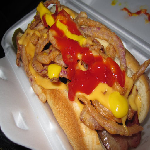

('hotdog', array([[ 0.36868352]], dtype=float32))


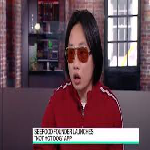

('hotdog', array([[ 0.]], dtype=float32))


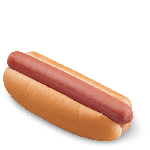

('not hotdog', array([[ 0.67250395]], dtype=float32))


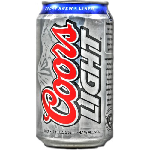

('not hotdog', array([[ 0.71534979]], dtype=float32))


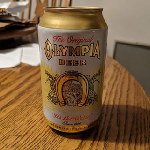

('not hotdog', array([[ 0.74751121]], dtype=float32))


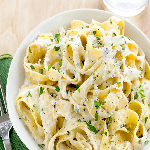

In [96]:
hotdog_img = load_img('../test/hotdog/2417.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img))
display(hotdog_img)
hotdog_img6 = load_img('../test/not_hotdog/1.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img6))
display(hotdog_img6)
hotdog_img3 = load_img('../test/hotdog/1.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img3))
display(hotdog_img3)
hotdog_img8 = load_img('../test/not_hotdog/3.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img8))
display(hotdog_img8)
hotdog_img7 = load_img('../test/not_hotdog/2.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img7))
display(hotdog_img7)
hotdog_img9 = load_img('../test/not_hotdog/4.jpg', False, target_size=(img_width, img_height))
print(predict(hotdog_img9))
display(hotdog_img9)